# 6.1節

## 実践１３

リスト 6.1












In [49]:
import matplotlib.pyplot as plt, numpy as np, math
import pandas as pd

imported_data = pd.read_csv('http://www.rokakuho.co.jp/data/books/0172/chapter6.csv')
imported_data = imported_data.values
n = 87
x_data = imported_data[0:n, 1] 
delta_data = imported_data[0:n, 2]

リスト 6.2

In [50]:
X_data = np.stack((np.ones(n), x_data), 1)
c = np.linalg.pinv(X_data) @ delta_data

リスト 6.3

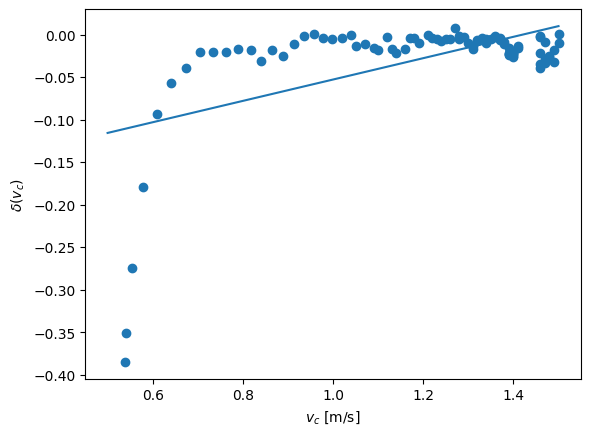

In [51]:
x = np.linspace(0.5, 1.5, 100)
delta_sol = c[1]*x + c[0]

fig, ax = plt.subplots()
ax.plot(x, delta_sol), ax.scatter(x_data, delta_data)
plt.xlabel('$v_c$ [m/s]'), plt.ylabel('$\delta(v_c)$')
plt.show()

リスト 6.4

In [52]:
def kernel_func(x1, x2, d):
    x1d = x2d = 1
    for m in range(d):
        x1d = np.hstack((x1d, x1**(m+1)))
        x2d = np.hstack((x2d, x2**(m+1)))
    return x1d @ x2d

def kernel_matrix(x1, x2, d):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], d)
    return K

c = np.empty((len(x_data), 5))
delta_sol = np.empty((len(x), 5))
for d in range(2, 7):
  K = kernel_matrix(x_data, x_data, d)
  c[:, d-2] = np.linalg.pinv(K) @ delta_data
  kx = kernel_matrix(x, x_data, d)
  delta_sol[:, d-2] = kx @ c[:, d-2]

リスト 6.5

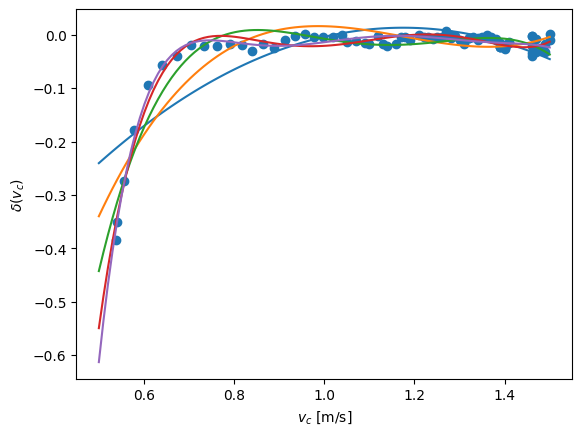

In [53]:
fig, ax = plt.subplots()
ax.plot(x, delta_sol), ax.scatter(x_data, delta_data)
plt.xlabel('$v_c$ [m/s]'), plt.ylabel('$\delta(v_c)$')
plt.show()

リスト 6.6

In [54]:
def kernel_func(x1, x2): 
    gamma = 10
    k = math.exp(-gamma*np.sum((x1-x2)**2))
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

x_data = x_data.reshape(-1, 1)
K = kernel_matrix(x_data, x_data)
c = np.linalg.pinv(K) @ delta_data

リスト 6.7

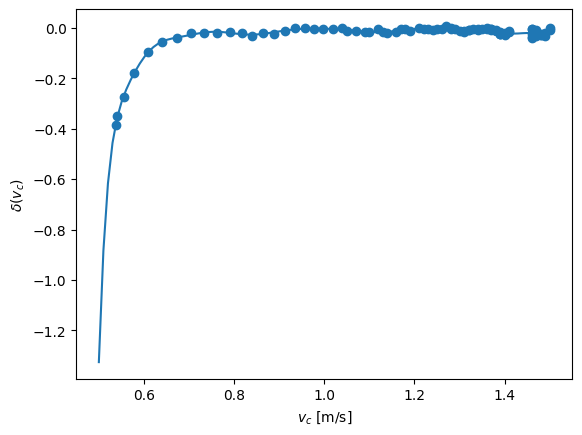

In [55]:
x = x.reshape(-1, 1)
k_s = kernel_matrix(x, x_data) 
delta_sol = k_s @ c

fig, ax = plt.subplots()
ax.plot(x, delta_sol), ax.scatter(x_data, delta_data)
plt.xlabel('$v_c$ [m/s]'), plt.ylabel('$\delta(v_c)$')
plt.show()

## 実践１４

リスト 6.8

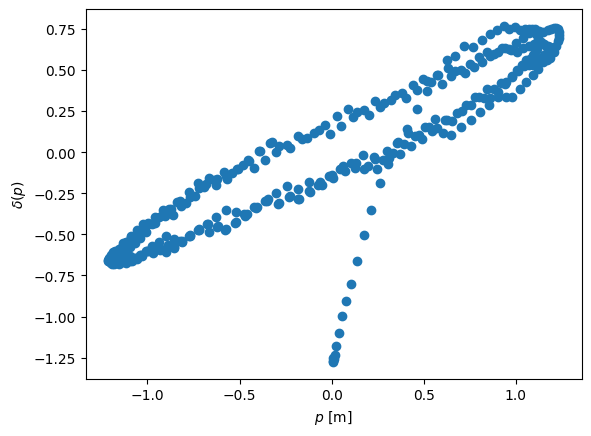

(Text(0.5, 28.0, '$p$ [m]'), Text(28.0, 0.5, '$\\delta(p)$'), None)

In [56]:
imported_data = pd.read_csv('http://www.rokakuho.co.jp/data/books/0172/chapter6.csv')
imported_data = imported_data.values

n = 372
t = imported_data[0:n, 4]
x_data = imported_data[0:n, 5] 
delta_data = imported_data[0:n, 6] 

fig, ax = plt.subplots()
ax.scatter(x_data, delta_data)
plt.xlabel('$p$ [m]'), plt.ylabel('$\delta(p)$'), plt.show()

リスト 6.9

In [57]:
X_data = np.stack((np.ones(n), x_data, t), 1)
c = np.linalg.pinv(X_data) @ delta_data

リスト 6.10

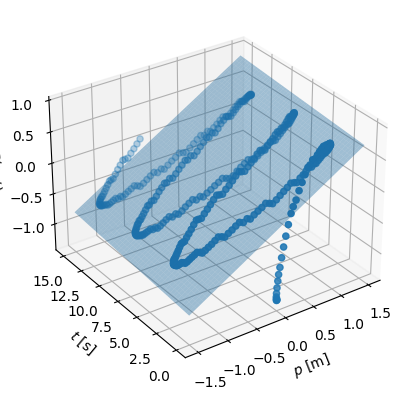

(None, None)

In [58]:
x1 = np.linspace(-1.5, 1.5, 100)
x2 = np.linspace(0, 15, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
delta_sol = c[2]*X[:,1] + c[1]*X[:,0] + c[0]
Delta_sol = delta_sol.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X1, X2, Delta_sol, alpha=0.4)
ax.scatter(x_data, t, delta_data)
ax.set_xlabel('$p$ [m]'), ax.set_ylabel('$t$ [s]')
ax.set_zlabel('$\delta(p,t)$')
ax.view_init(azim=235), plt.show()

リスト 6.11

In [59]:
def kernel_func(x1, x2, hyperparam): 
    phi1 = np.array([1, x1[0], x1[1], np.sin(hyperparam*x1[1])])
    phi2 = np.array([1, x2[0], x2[1], np.sin(hyperparam*x2[1])])
    return phi1 @ phi2

def kernel_matrix(x1, x2, hyperparam):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], hyperparam)
    return K
    
XT_data = np.stack((x_data, t), 1)
hyperparam = 2*np.pi/5
K = kernel_matrix(XT_data, XT_data, hyperparam)
c = np.linalg.pinv(K) @ delta_data

リスト 6.12

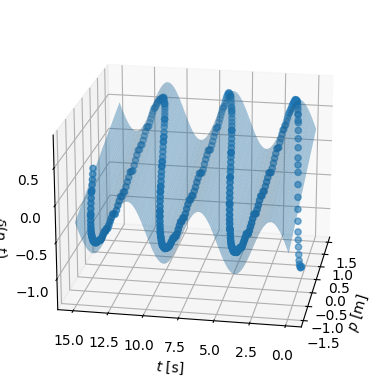

(None, None)

In [60]:
kx = kernel_matrix(X, XT_data, hyperparam)
Delta_sol = (kx @ c).reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X1, X2, Delta_sol, alpha=0.4)
ax.scatter(x_data, t, delta_data)
ax.set_xlabel('$p$ [m]'), ax.set_ylabel('$t$ [s]')
ax.set_zlabel('$\delta(p,t)$')
ax.view_init(elev=20, azim=190), plt.show()

# 6.2節

## 実践１５

In [61]:
import numpy as np, matplotlib.pyplot as plt, math

In [62]:
def kernel_func(x1, x2, i, j, hp): 
    if i == j and all(x1 == x2):
      k = hp[0]**2 + hp[2]**2
    else:
      k = hp[0]**2*math.exp(-(1/(2*hp[1]**2))*np.sum((x1-x2)**2))
    return k

def kernel_matrix(x1, x2, hyperparam):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], i, j, hyperparam)
    return K

In [63]:
import matplotlib.pyplot as plt, numpy as np, math
import pandas as pd

imported_data = pd.read_csv('http://www.rokakuho.co.jp/data/books/0172/chapter6.csv')
imported_data = imported_data.values

n = 22
# 5回目の実験データ
x_data = imported_data[0:n, 8] 
z_data = imported_data[0:n, 9] 
# 10回目の実験データ 
# x_data = imported_data[0:n, 11] 
# z_data = imported_data[0:n, 12] 

x = np.linspace(-3, 3, 100)

In [64]:
!pip install GPy
import GPy

kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(x_data.reshape(-1, 1), z_data.reshape(-1,1), kernel=kernel)

hparam_priors = 3*[None]
hparam_priors[0] = GPy.priors.Gaussian(mu=0, sigma=1)
hparam_priors[1] = GPy.priors.Gaussian(mu=0, sigma=1)
hparam_priors[2] = GPy.priors.Gaussian(mu=0, sigma=0.5)
param_name = model.parameter_names()
for i in range(3):
  hparam_priors[i].domain = "positive"
  model[param_name[i]].set_prior(hparam_priors[i])
  
model.optimize(messages=False, optimizer='scg', max_iters=1e5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[1.0182636346275953, 0.7178014808326812, 0.6408733889884188]


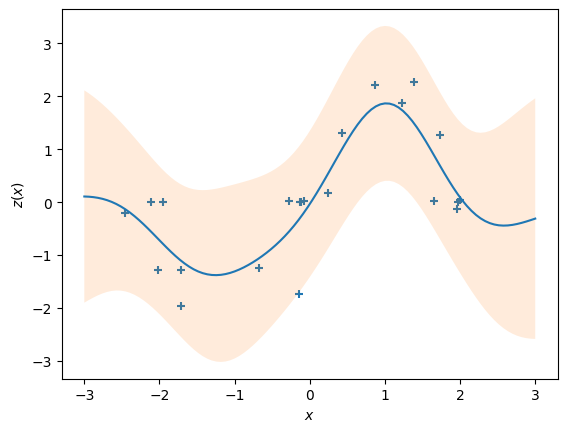

In [65]:
sigma_f = np.sqrt(model.rbf.variance[0])
q = model.rbf.lengthscale[0]
sigma_n = np.sqrt(model.Gaussian_noise.variance[0])
hyperparam = [sigma_f, q, sigma_n]
print(hyperparam)

x, x_data = x.reshape(-1,1), x_data.reshape(-1,1)
K_ss = kernel_matrix(x, x, hyperparam)
K = kernel_matrix(x_data, x_data, hyperparam)
invK = np.linalg.inv(K)
k_s = kernel_matrix(x, x_data, hyperparam) 

c = invK @ z_data
z_mean = k_s @ c
z_var = K_ss - k_s @ invK @ k_s.T
z_stdv = np.sqrt(np.diag(z_var))

fig, ax = plt.subplots()
ax.plot(x, z_mean)
ax.scatter(x_data, z_data, marker='+')
ax.fill_between(x.flatten(), (z_mean - 2*z_stdv).flatten(), (z_mean + 2*z_stdv).flatten(), alpha=0.15)
plt.xlabel('$x$'), plt.ylabel('$z(x)$')
plt.show()

## 実践１６

In [66]:
import matplotlib.pyplot as plt, numpy as np, math
import pandas as pd

リスト 6.13

In [67]:
imported_data = pd.read_csv('http://www.rokakuho.co.jp/data/books/0172/chapter6.csv')
imported_data = imported_data.values

n = 60
x_plus_data = imported_data[0:n, 14:16].T 
x_minus_data = imported_data[0:n, 16:18].T 
x_data = np.hstack([x_plus_data, x_minus_data])

lam_data = np.hstack([np.ones(n), -np.ones(n)])

リスト 6.14

In [68]:
def kernel_func(x1, x2): 
    k = math.exp(-np.sum((x1-x2)**2)/2)
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

import cvxpy as cp

c = cp.Variable(2*n)
v0 = cp.Variable(1)
K = kernel_matrix(x_data.T, x_data.T)
cons = [np.diag(lam_data) @ (K @ c + v0*np.ones(2*n)) >= np.ones(2*n)]
Kcost = cp.Parameter(shape=K.shape, value=K, PSD=True)
obj = cp.Minimize(cp.quad_form(c, Kcost))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

 /usr/local/lib/python3.9/dist-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning:You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming


47713.277094974896

リスト 6.15

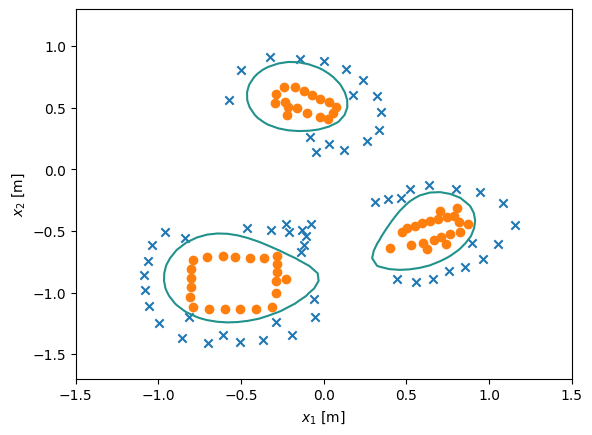

(Text(0.5, 26.800000000000004, '$x_1$ [m]'),
 Text(26.799999999999997, 0.5, '$x_2$ [m]'),
 None)

In [69]:
x1, x2 = np.linspace(-1.5, 1.5, 50), np.linspace(-1.7, 1.3, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
kx = kernel_matrix(X, x_data.T)
c, v0 = c.value, v0.value
f = kx @ c + v0

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
plt.contour(X1, X2, f.reshape(X1.shape), 0), 
plt.xlabel('$x_1$ [m]'), plt.ylabel('$x_2$ [m]'), plt.show()

## 実践１７

In [70]:
import matplotlib.pyplot as plt, numpy as np, math
import pandas as pd

imported_data = pd.read_csv('http://www.rokakuho.co.jp/data/books/0172/chapter6.csv')
imported_data = imported_data.values

n = 60
x_plus_data = imported_data[0:n, 19:21].T 
x_minus_data = imported_data[0:n, 21:23].T 
x_data = np.hstack([x_plus_data, x_minus_data])

lam_data = np.hstack([np.ones(n), -np.ones(n)])

In [71]:
def kernel_func(x1, x2): 
    k = math.exp(-np.sum((x1-x2)**2)/2)
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

import cvxpy as cp

c = cp.Variable(2*n) 
v0 = cp.Variable(1)
zeta = cp.Variable(2*n) 
beta = 1400
K = kernel_matrix(x_data.T, x_data.T)
cons = [np.diag(lam_data) @ (K @ c + v0*np.ones(2*n)) >= np.ones(2*n) - zeta, zeta >= np.zeros(2*n)]
Kcost = cp.Parameter(shape=K.shape, value=K, PSD=True)
obj = cp.Minimize(cp.quad_form(c, Kcost) + beta*cp.sum(zeta))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

 /usr/local/lib/python3.9/dist-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning:You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming


51204.58402293526

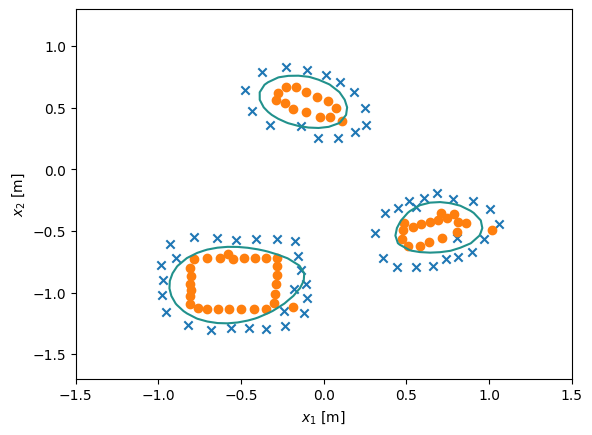

(Text(0.5, 26.800000000000004, '$x_1$ [m]'),
 Text(26.799999999999997, 0.5, '$x_2$ [m]'),
 None)

In [72]:
x1, x2 = np.linspace(-1.5, 1.5, 50), np.linspace(-1.7, 1.3, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
kx = kernel_matrix(X, x_data.T)
c, v0 = c.value, v0.value
f = kx @ c + v0

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
plt.contour(X1, X2, f.reshape(X1.shape), 0), 
plt.xlabel('$x_1$ [m]'), plt.ylabel('$x_2$ [m]'), plt.show()